# Clustering Experiments with BERT Features

This notebook clusters articles using the combined dataset with BERT embeddings and article metadata.


In [1]:
# Ensure project root is the working directory so relative paths resolve
import os
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
print('CWD:', os.getcwd())


CWD: c:\Users\tom\coding_projects\data_analytics_projects\h_and_m_data_analysis


In [2]:
import polars as pl
from hnm_data_analysis.clustering.article_clustering import ArticleClusterer, ClusteringConfig
from hnm_data_analysis.data_understanding.data_report_generator import generate_data_report

# Paths
features_parquet = 'data/features/bert/pca_embeddings.parquet'
articles_metadata = 'data/cleaned/articles_cleaned.parquet'

# Load features from parquet (expects 'article_id' and numeric feature columns)
clusterer = ArticleClusterer(features_path=features_parquet,
                             articles_metadata_path=articles_metadata)
features, article_ids = clusterer.load_features()
clusterer.load_articles_metadata()


Loaded features: 42,229 articles x 50 features
Loaded articles metadata: 42,298 articles


article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,product_type_no_negative_fixed,graphical_appearance_no_negative_fixed,product_code_invalid
i64,i64,str,i64,cat,cat,i64,cat,i64,cat,i64,cat,i64,cat,i64,cat,str,cat,i64,cat,i64,cat,i64,cat,cat,bool,bool,bool
816591001,816591,"""Dingo tee TVP""",255,"""T-shirt""","""Garment Upper body""",1010017,"""Stripe""",73,"""Dark Blue""",4,"""Dark""",2,"""Blue""",1640,"""Tops Fancy Jersey""","""D""","""Divided""",2,"""Divided""",53,"""Divided Collection""",1005,"""Jersey Fancy""","""T-shirt in soft cotton jersey …",false,false,false
804472003,804472,"""Michael HT SB""",94,"""Sneakers""","""Shoes""",1010016,"""Solid""",9,"""Black""",4,"""Dark""",5,"""Black""",4211,"""Kids Boy Shoes""","""J""","""Children Accessories, Swimwear""",4,"""Baby/Children""",42,"""Kids & Baby Shoes""",1020,"""Shoes""","""Hi-tops in patterned imitation…",false,false,false
693915001,693915,"""Brazil Trousers""",272,"""Trousers""","""Garment Lower body""",1010004,"""Check""",13,"""Beige""",2,"""Medium Dusty""",11,"""Beige""",1948,"""Trousers & Skirt""","""A""","""Ladieswear""",1,"""Ladieswear""",18,"""Womens Trend""",1009,"""Trousers""","""Trousers in woven fabric with …",false,false,false
790904007,790904,"""Billy Cargo Pant""",272,"""Trousers""","""Garment Lower body""",1010016,"""Solid""",13,"""Beige""",2,"""Medium Dusty""",11,"""Beige""",5656,"""Trouser""","""F""","""Menswear""",3,"""Menswear""",21,"""Contemporary Casual""",1009,"""Trousers""","""Trousers in a cotton weave wit…",false,false,false
829618001,829618,"""Coachella Push Melbourne""",306,"""Bra""","""Underwear""",1010016,"""Solid""",10,"""White""",3,"""Light""",9,"""White""",1338,"""Expressive Lingerie""","""B""","""Lingeries/Tights""",1,"""Ladieswear""",61,"""Womens Lingerie""",1017,"""Under-, Nightwear""","""Push-up bra in lace with under…",false,false,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
699424001,699424,"""Ring Ring Brief""",59,"""Swimwear bottom""","""Swimwear""",1010016,"""Solid""",9,"""Black""",4,"""Dark""",5,"""Black""",4242,"""Swimwear""","""B""","""Lingeries/Tights""",1,"""Ladieswear""",60,"""Womens Swimwear, beachwear""",1018,"""Swimwear""","""Fully lined bikini bottoms wit…",false,false,false
842056002,842056,"""FUNC. SB Mountain waterpr pant""",276,"""Outdoor trousers""","""Garment Lower body""",1010016,"""Solid""",9,"""Black""",4,"""Dark""",5,"""Black""",7852,"""Kids Boy Outdoor""","""H""","""Children Sizes 92-140""",4,"""Baby/Children""",45,"""Kids Outerwear""",1007,"""Outdoor""","""Padded outdoor trousers in win…",false,false,false
870059002,870059,"""Sibling 1 SG L/S T-shirt""",254,"""Top""","""Garment Upper body""",1010001,"""All over pattern""",52,"""Pink""",7,"""Medium""",4,"""Pink""",7616,"""Kids Girl Jersey Fancy""","""H""","""Children Sizes 92-140""",4,"""Baby/Children""",76,"""Kids Girl""",1005,"""Jersey Fancy""","""Long-sleeved top in soft cotto…",false,false,false


Finding optimal k using elbow method with kmeans...
k=2: elbow score = 38524.8945
k=3: elbow score = 35277.1992
k=4: elbow score = 32548.1055
k=5: elbow score = 30944.5488
k=6: elbow score = 29564.8242
k=7: elbow score = 28568.2930
k=8: elbow score = 27585.7363
k=9: elbow score = 26630.9219
k=10: elbow score = 25788.8906
k=11: elbow score = 25139.2695
k=12: elbow score = 24621.5664
k=13: elbow score = 24062.4551
k=14: elbow score = 23413.8730
k=15: elbow score = 22906.7539
k=16: elbow score = 22350.3164
k=17: elbow score = 22058.9668
k=18: elbow score = 21492.3281
k=19: elbow score = 21137.1387
k=20: elbow score = 20966.8809
k=21: elbow score = 20289.1797
k=22: elbow score = 19961.7754
k=23: elbow score = 19659.7344
k=24: elbow score = 19197.0898
k=25: elbow score = 18847.3828
k=26: elbow score = 18563.1621
k=27: elbow score = 18362.7383
k=28: elbow score = 18157.0449
k=29: elbow score = 18079.0020
k=30: elbow score = 17734.9609
k=31: elbow score = 17443.3086
k=32: elbow score = 17453.

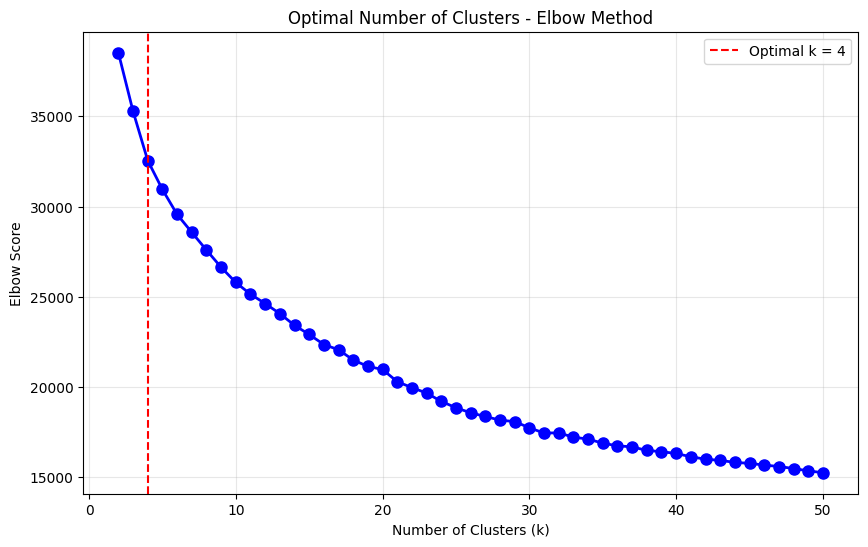

Finding optimal k using silhouette method with kmeans...
k=2: silhouette score = 0.0872
k=3: silhouette score = 0.1044
k=4: silhouette score = 0.1286
k=5: silhouette score = 0.1332
k=6: silhouette score = 0.1451
k=7: silhouette score = 0.1519
k=8: silhouette score = 0.1521
k=9: silhouette score = 0.1624
k=10: silhouette score = 0.1643
k=11: silhouette score = 0.1640
k=12: silhouette score = 0.1626
k=13: silhouette score = 0.1606
k=14: silhouette score = 0.1616
k=15: silhouette score = 0.1735
k=16: silhouette score = 0.1772
k=17: silhouette score = 0.1749
k=18: silhouette score = 0.1725
k=19: silhouette score = 0.1797
k=20: silhouette score = 0.1854
k=21: silhouette score = 0.1880
k=22: silhouette score = 0.1934
k=23: silhouette score = 0.1931
k=24: silhouette score = 0.1997
k=25: silhouette score = 0.2038
k=26: silhouette score = 0.2068
k=27: silhouette score = 0.2086
k=28: silhouette score = 0.2041
k=29: silhouette score = 0.2027
k=30: silhouette score = 0.2145
k=31: silhouette score 

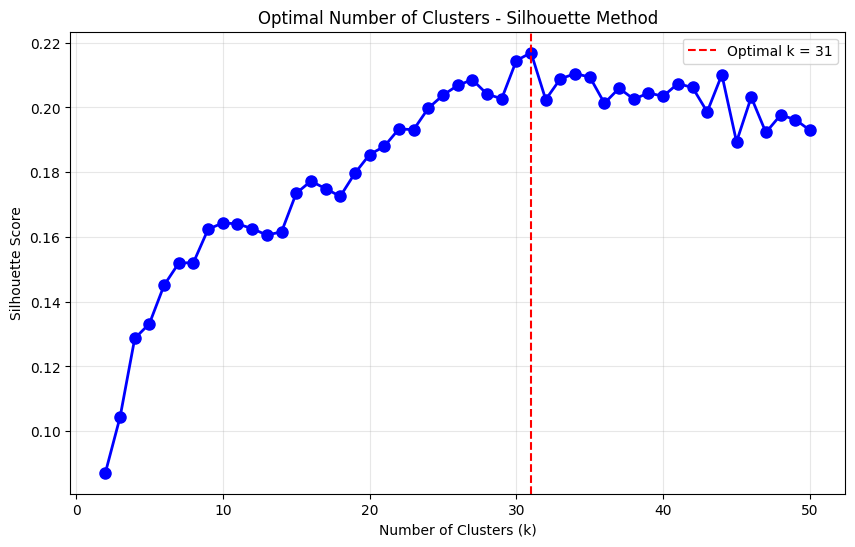

Saved k selection plot to: results/bert_clustering\optimal_k_calinski_harabasz_2_50.png


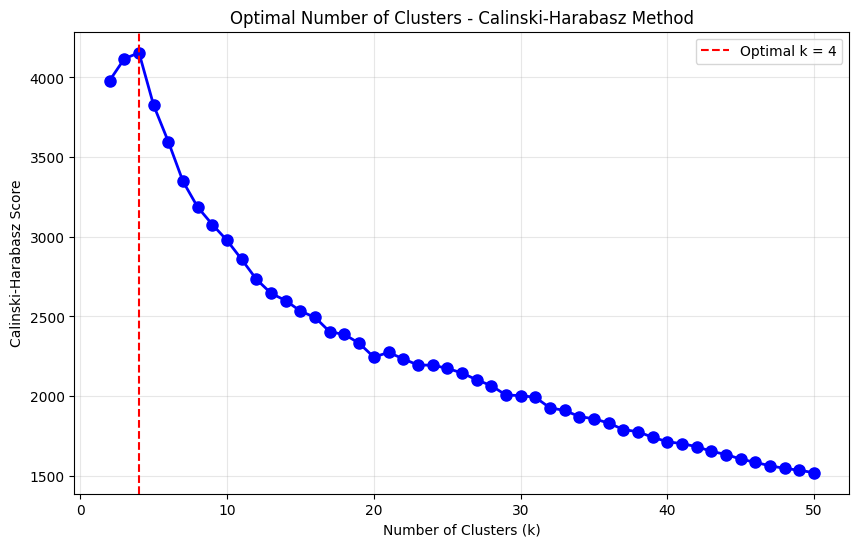

Saved k selection plot to: results/bert_clustering\optimal_k_davies_bouldin_2_50.png


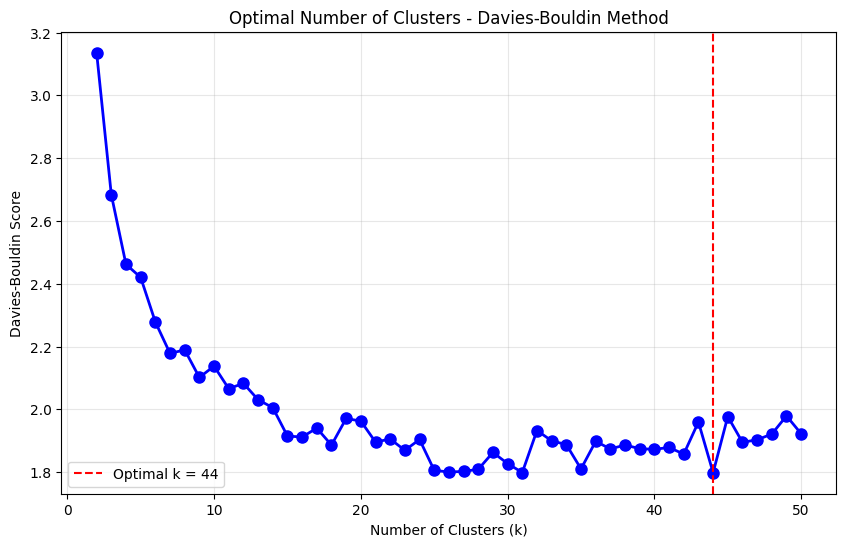

Recommendation → k=31 (silhouette).  Elbow≈4, CH=4, DB=44


In [3]:
# Find the optimal number of clusters
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define k range
k_min, k_max = 2, 50
k_range = (k_min, k_max)

# Ensure output directory for plots
out_dir = 'results/bert_clustering'
os.makedirs(out_dir, exist_ok=True)

# 1) Elbow (KMeans inertia)
opt_k_elbow, scores_elbow = clusterer.find_optimal_k(k_range=k_range, algorithm='kmeans', method='elbow')
clusterer.plot_k_selection(scores_elbow, method='elbow', optimal_k=opt_k_elbow,
                           save_path=os.path.join(out_dir, f'optimal_k_elbow_{k_min}_{k_max}.png'))

# 2) Silhouette
opt_k_sil, scores_sil = clusterer.find_optimal_k(k_range=k_range, algorithm='kmeans', method='silhouette')
clusterer.plot_k_selection(scores_sil, method='silhouette', optimal_k=opt_k_sil,
                           save_path=os.path.join(out_dir, f'optimal_k_silhouette_{k_min}_{k_max}.png'))

# 3) Calinski–Harabasz (higher is better) and 4) Davies–Bouldin (lower is better)
scores_ch = {}
scores_db = {}
for k in range(k_min, k_max + 1):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(clusterer.features)
    # Only compute when >=2 clusters exist
    if len(set(labels)) > 1:
        scores_ch[k] = calinski_harabasz_score(clusterer.features, labels)
        scores_db[k] = davies_bouldin_score(clusterer.features, labels)

# Plot CH and DB using the clusterer's plot helper
best_k_ch = max(scores_ch, key=scores_ch.get)
best_k_db = min(scores_db, key=scores_db.get)
clusterer.plot_k_selection(scores_ch, method='calinski-harabasz', optimal_k=best_k_ch,
                           save_path=os.path.join(out_dir, f'optimal_k_calinski_harabasz_{k_min}_{k_max}.png'))
clusterer.plot_k_selection(scores_db, method='davies-bouldin', optimal_k=best_k_db,
                           save_path=os.path.join(out_dir, f'optimal_k_davies_bouldin_{k_min}_{k_max}.png'))

# Simple recommendation strategy: prefer silhouette's optimum; show others for context
recommended_k = int(opt_k_sil)
print(f"Recommendation → k={recommended_k} (silhouette).  Elbow≈{opt_k_elbow}, CH={best_k_ch}, DB={best_k_db}")


In [4]:
# Cluster with the selected k
try:
    k_to_use = int(recommended_k)
except Exception:
    k_to_use = 32
print(f"Clustering with k={k_to_use}")
config = ClusteringConfig(algorithm='kmeans', n_clusters=k_to_use)
results = clusterer.cluster(config)
results.n_clusters, results.silhouette


Clustering with k=31
Performing kmeans clustering...
Clustering completed: 31 clusters
Silhouette Score: 0.2169
Calinski-Harabasz Index: 1992.8160
Davies-Bouldin Index: 1.7989


(31, 0.216886)

Creating 2D visualization using PCA...
Saved cluster visualization to: ../results/bert_clustering/clusters_pca_10.png


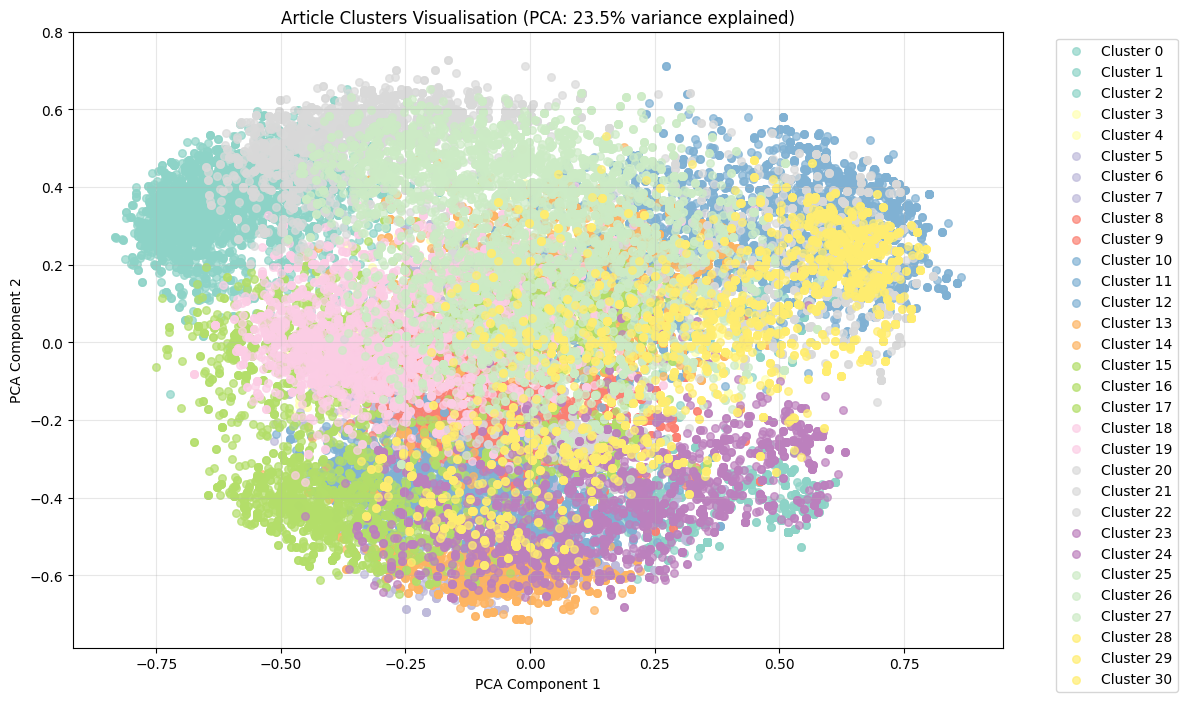

Creating 2D visualization using TSNE...
Saved cluster visualization to: ../results/bert_clustering/clusters_tsne_10.png


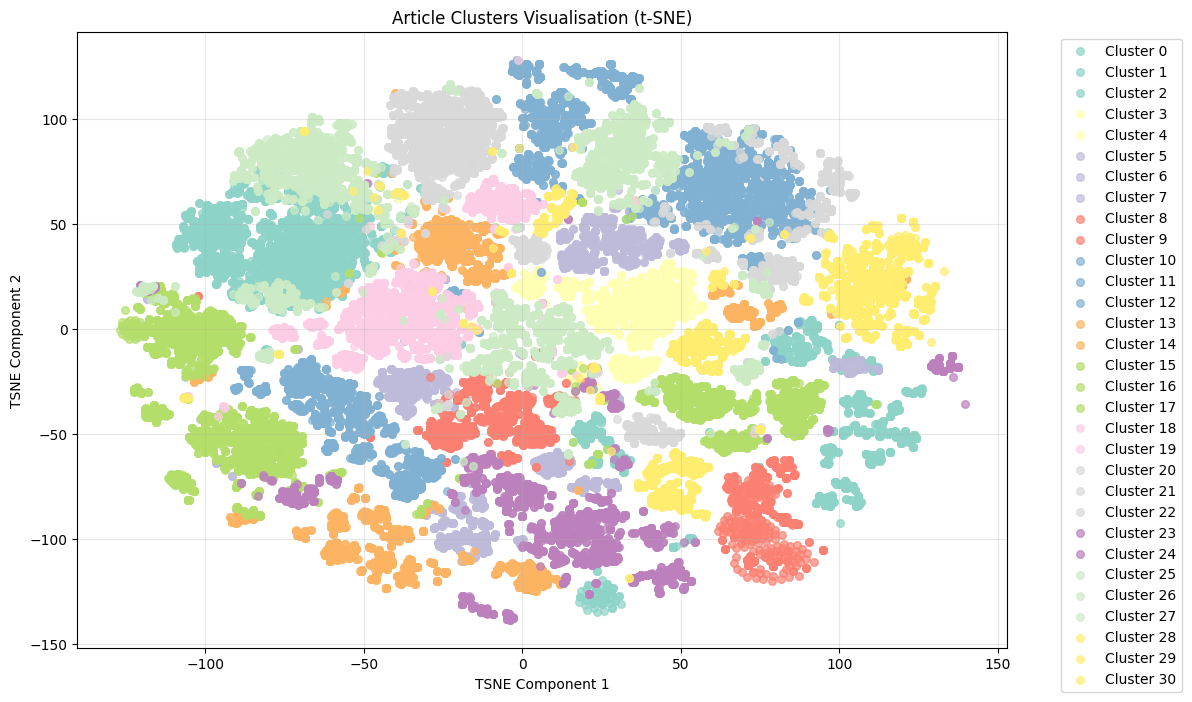

In [5]:
# Visualise clusters (PCA and t-SNE)
clusterer.visualise_clusters(method='pca', save_path='../results/bert_clustering/clusters_pca_10.png')
clusterer.visualise_clusters(method='tsne', save_path='../results/bert_clustering/clusters_tsne_10.png')

### Display 3 samples from 3 sample clusters


In [6]:
# Sample 3 clusters at random and display 3 articles from each
import numpy as np

labels = np.array(results.labels)
unique_clusters = np.array([c for c in set(labels) if c != -1])
num_to_sample = min(3, len(unique_clusters))
sampled_clusters = np.random.choice(unique_clusters, size=num_to_sample, replace=False)

print(f"Sampled clusters: {sampled_clusters}")

# Build a lookup from article_id to row index
article_ids_list = list(results.article_ids) if hasattr(results, 'article_ids') else clusterer.article_ids

# Ensure metadata is loaded
metadata = clusterer.articles_metadata

for cid in sampled_clusters:
    idxs = np.where(labels == cid)[0]
    if len(idxs) == 0:
        continue
    sample_idxs = np.random.choice(idxs, size=min(3, len(idxs)), replace=False)
    sampled_article_ids = [article_ids_list[i] for i in sample_idxs]
    print(f"\nCluster {int(cid)} — {len(idxs)} items; showing {len(sampled_article_ids)} samples")
    if metadata is not None:
        display(
            metadata.filter(pl.col("article_id").is_in(sampled_article_ids))
                   .select([
                       "article_id",
                       "product_group_name",
                       "product_type_name",
                       "department_name",
                       "garment_group_name",
                       "colour_group_name",
                       "graphical_appearance_name",
                       "detail_desc"
                   ])
        )
    else:
        print(sampled_article_ids)


Sampled clusters: [16 20  2]

Cluster 16 — 1172 items; showing 3 samples


article_id,product_group_name,product_type_name,department_name,garment_group_name,colour_group_name,graphical_appearance_name,detail_desc
i64,cat,cat,cat,cat,cat,cat,cat
817551001,"""Garment Lower body""","""Skirt""","""Jersey""","""Jersey Fancy""","""Black""","""Sequin""","""Fitted, knee-length skirt in j…"
929216001,"""Garment Lower body""","""Skirt""","""Divided+""","""Unknown""","""Light Beige""","""Solid""","""Knee-length, pleated skirt in …"
674606024,"""Garment Lower body""","""Skirt""","""Skirts""","""Skirts""","""Blue""","""Denim""","""Short, A-line skirt with a hig…"



Cluster 20 — 1865 items; showing 3 samples


article_id,product_group_name,product_type_name,department_name,garment_group_name,colour_group_name,graphical_appearance_name,detail_desc
i64,cat,cat,cat,cat,cat,cat,cat
859696001,"""Garment Upper body""","""Blouse""","""Projects Woven Tops""","""Blouses""","""Blue""","""Solid""","""Blouse in lightweight Tencel™ …"
855076002,"""Garment Upper body""","""Blouse""","""Blouse""","""Blouses""","""Red""","""Solid""","""Blouse woven in a cotton blend…"
545365001,"""Garment Upper body""","""Top""","""Woven top""","""Blouses""","""White""","""Solid""","""Wide, V-neck blouse in an airy…"



Cluster 2 — 927 items; showing 3 samples


article_id,product_group_name,product_type_name,department_name,garment_group_name,colour_group_name,graphical_appearance_name,detail_desc
i64,cat,cat,cat,cat,cat,cat,cat
804996007,"""Garment Upper body""","""Vest top""","""Ladies Sport Bras""","""Jersey Fancy""","""Off White""","""Solid""","""Sports vest top in fast-drying…"
699773003,"""Garment Upper body""","""T-shirt""","""Tops Boys""","""Unknown""","""Blue""","""Solid""","""Sports top in fast-drying func…"
449570036,"""Garment Upper body""","""T-shirt""","""Men Sport Woven""","""Jersey Fancy""","""Black""","""Solid""","""Sports top in fast-drying func…"


In [7]:
# Save results (labels, model, metrics), then build final dataset keeping all articles
clusterer.save_results('../results/bert_clustering')

# Build final features by left-joining labels onto all cleaned articles
import os
import polars as pl
import numpy as np

cleaned_path = 'data/cleaned/articles_cleaned.parquet'
final_dir = 'data/features/final'
final_path = os.path.join(final_dir, 'articles_features_final.parquet')

# Labels from results
labels_df = pl.DataFrame({
    'article_id': clusterer.article_ids,
    'bert_cluster': np.asarray(results.labels, dtype=int)
})

# Keep all articles; add cluster labels where available (null where missing)
cleaned_df = pl.read_parquet(cleaned_path)
final_df = cleaned_df.join(labels_df, on='article_id', how='left')

# Select only the required columns: article_id, categorical columns, detail_desc, and bert_cluster
categorical_cols = [
    'product_type_name', 'product_group_name', 'graphical_appearance_name', 
    'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name',
    'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name'
]

columns_to_keep = ['article_id'] + categorical_cols + ['detail_desc', 'bert_cluster']
final_df_filtered = final_df.select(columns_to_keep)

os.makedirs(final_dir, exist_ok=True)
final_df_filtered.write_parquet(final_path)
print(f'Saved final features to: {final_path}\nRows: {final_df_filtered.height:,}  Cols: {len(final_df_filtered.columns)}')
print(f'Columns kept: {final_df_filtered.columns}')

Saved cluster labels to: ../results/bert_clustering\cluster_labels.csv
Saved clustering model to: ../results/bert_clustering\clustering_model.joblib
Saved results metadata to: ../results/bert_clustering\clustering_results.json
Saved final features to: data/features/final\articles_features_final.parquet
Rows: 42,298  Cols: 14
Columns kept: ['article_id', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc', 'bert_cluster']


In [ ]:
# Generate data report for data\features\final\articles_features_final.parquet
print(generate_data_report("data/features/final/articles_features_final.parquet"))

Data report generated successfully!
Analysed file: data\features\final\articles_features_final.parquet
Report saved to: C:\Users\tom\coding_projects\data_analytics_projects\h_and_m_data_analysis\results\data_documentation\data_reports\articles_features_final_data_report.md
results\data_documentation\data_reports\articles_features_final_data_report.md


: 